<Figure size 432x288 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

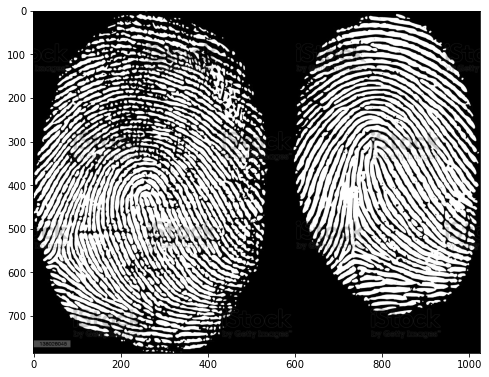

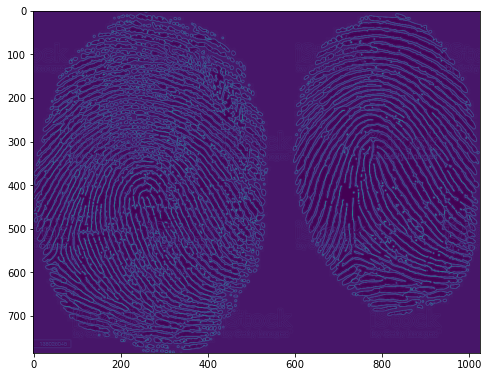

In [80]:
# -*- coding: utf-8 -*-

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Grayscale
def BGR2GRAY(img):
    # Grayscale
    gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
    return gray

# Gabor Filter
def Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
    # get half size
    d = K_size // 2

    # prepare kernel
    gabor = np.zeros((K_size, K_size), dtype=np.float32)

    # each value
    for y in range(K_size):
        for x in range(K_size):
            
            # distance from center
            px = x - d
            py = y - d

            # degree -> radian степень в радианы
            theta = angle / 180. * np.pi
            
            # get kernel x
            _x = np.cos(theta) * px + np.sin(theta) * py

            # get kernel y
            _y = -np.sin(theta) * px + np.cos(theta) * py

            # fill kernel
            gabor[y, x] = np.exp(-(_x**2 + Gamma**2 * _y**2) / (2 * Sigma**2)) * np.cos(2*np.pi*_x/Lambda + Psi)

    # kernel normalization
    gabor /= np.sum(np.abs(gabor))

    return gabor


# Используйте фильтр Габора, чтобы воздействовать на изображение
def Gabor_filtering(gray, K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
    # get shape
    H, W = gray.shape

    # padding
    # gray = np.pad(gray, (K_size//2, K_size//2), 'edge')

    # prepare out image
    out = np.zeros((H, W), dtype=np.float32)

    # get gabor filter
    gabor = Gabor_filter(K_size=K_size, Sigma=Sigma, Gamma=Gamma, Lambda=Lambda, Psi=0, angle=angle)
    #print("Gabor")
    #plt.imshow(gabor)
    plt.show()
        
    # filtering
    
    out = cv2.filter2D(gray, -1, gabor)

    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)

    return out


# Используйте 6 фильтров Габора с разными углами для извлечения деталей на изображении
def Gabor_process(img):
    # get shape
    H, W, _ = img.shape

    # gray scale
    gray = BGR2GRAY(img).astype(np.float32)

    # define angle
    # As = [0, 45, 90, 135]
    As = [0,30,60,90,120,150]

    # prepare pyplot
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)

    out = np.zeros([H, W], dtype=np.float32)

    # each angle
    for i, A in enumerate(As):
        # gabor filtering
        _out = Gabor_filtering(gray, K_size=15, Sigma=1.5, Gamma=1, Lambda=3, angle = A)
        
        #print("filtering")
        #plt.imshow( _out, cmap = 'gray')
        plt.show()

        # add gabor filtered image
        out += _out

    # scale normalization
    out = out / out.max() * 255
    out = out.astype(np.uint8)

    return out


# Read image
img = cv2.imread(r"otp.jpg").astype(np.float32)

# gabor process
out = Gabor_process(img)

cv2.imwrite("out.jpg", out)
img = BGR2GRAY(img)
'''
plt.imshow(img, 'Greys')
plt.show()

print('Result')
plt.imshow(out)
plt.show()
#cv2.imshow("result", out)
'''
_,ax = plt.subplots(figsize=(8,8))
ax.imshow(img, "Greys", vmin = 0, vmax = 255)
_,ax = plt.subplots(figsize=(8,8))
ax.imshow(out, vmin = 0, vmax = 255)
plt.show

SyntaxError: can't assign to function call (Temp/ipykernel_10084/2138033170.py, line 25)